<a href="https://colab.research.google.com/github/surya333356/OIBSIP_Task-2_Marketing_Analytics-Customer_Segmentation_EDA_Project/blob/main/Task_2_Marketing_Analytics_Customer_Segmentation_EDA_Project(Oasis_Infobyte_Surya_Singh).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Marketing Analytics: Customer Segmentation



 **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member  -** SURYA SINGH


# **Project Summary -**

Customer segmentation is a crucial marketing strategy that enables businesses to divide their customer base into distinct segments based on common characteristics such as demographics, behaviors, and preferences. By segmenting customers, companies can tailor their marketing efforts to meet the specific needs and desires of each group, resulting in more effective and personalized campaigns.

The primary goal of customer segmentation is to gain a deeper understanding of the customer base, which in turn allows for more targeted marketing strategies. This approach helps businesses identify which customer groups are most valuable, what products or services they are most interested in, and how to communicate with them effectively. By addressing the unique needs of each segment, companies can enhance customer satisfaction, increase loyalty, and ultimately drive revenue growth.

Exploratory Data Analysis (EDA) plays a pivotal role in customer segmentation. EDA is the process of analyzing datasets to summarize their main characteristics, often using visual methods. It helps in understanding the data, detecting anomalies, and testing hypotheses. Before applying any segmentation algorithm, it's essential to perform EDA to ensure the data is clean, relevant, and well-prepared.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


1.How can we identify distinct customer segments based on purchasing behavior,
  frequency, and volume of transactions?

2.Which customer segments are most likely to stop using our services or
  products, and what are the key factors contributing to this churn?

3.How can we develop targeted marketing strategies for different customer
  segments to maximize engagement and conversion rates?

4.How can we use customer segmentation to improve product recommendations and
  increase cross-selling and upselling opportunities?

5.What are the predicted lifetime values of different customer segments,and     
  how can we use this information to prioritize marketing efforts?

6.How effective is our current customer segmentation model in terms of
  predicting customer behavior and improving marketing outcomes?

7.How can we measure the return on investment (ROI) of marketing campaigns
  targeted at different customer segments?

8.What is the relationship between customer segmentation and customer
  satisfaction, and how can we use this information to improve overall service quality?




#### **Define Your Business Objective?**

The goal of this project is to improve marketing strategies by identifying distinct customer segments within the existing customer base. By understanding these segments, the business can tailor its marketing efforts, enhance customer engagement, optimize product offerings, and increase overall profitability.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv
import ast
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# Used to display all hidden columns
pd.set_option('display.max_columns',None)

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
path='/content/drive/MyDrive/OASIS INFOBYTE INTERN/Task-2/ifood_df.csv'

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
cs=pd.read_csv(path)
cs

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,74,2178,0,0,0,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [ ]:
# Creating a duplicate copy of original dataset before making any changes it
cs1=cs.copy()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
cs1.shape

(2205, 39)

### Dataset Information

In [ ]:
# Dataset Info
cs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
cs1.duplicated().sum()

184

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
cs1.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


### What did you know about your dataset?

We have no missing values.But we have 184 duplicate values,so we have to remove them.So now we have moved to further analysis.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
cs1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [ ]:
# Dataset Describe
cs1.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


### Variables Description

**Income:** The annual income of the customer.

**Kidhome:** The number of children in the customer's home.

**Teenhome:** The number of teenagers in the customer's home.

**Recency:** The number of days since the customer's last purchase.

**MntWines:** Amount spent on wine products.

**MntFruits:** Amount spent on fruit products.

**MntMeatProducts:** Amount spent on meat products.

**MntFishProducts:** Amount spent on fish products.

**MntSweetProducts:** Amount spent on sweet products.

**MntGoldProds:** Amount spent on gold products.

**NumDealsPurchases:** Number of purchases made with a discount.

**NumWebPurchases:** Number of purchases made through the web.

**NumCatalogPurchases:** Number of purchases made through a catalog.

**NumStorePurchases:** Number of purchases made in-store.

**NumWebVisitsMonth:** Number of visits to the company’s website per month.

**AcceptedCmp3:** Binary indicator of whether the customer accepted the third campaign.

**AcceptedCmp4:** Binary indicator of whether the customer accepted the fourth campaign.

**AcceptedCmp5:** Binary indicator of whether the customer accepted the fifth campaign.

**AcceptedCmp1:** Binary indicator of whether the customer accepted the first campaign.

**AcceptedCmp2:** Binary indicator of whether the customer accepted the second campaign.

**Complain:** Binary indicator of whether the customer has complained about the company's products or services.

**Z_CostContact:** Cost associated with contacting the customer.

**Z_Revenue:** Revenue generated from the customer.

**Response:** Binary indicator of whether the customer responded to the marketing campaign.

**Age:** Age of the customer.

**Customer_Days:** Number of days since the customer was acquired.

**marital_Divorced:** Binary indicator of whether the customer is divorced.

**marital_Married:** Binary indicator of whether the customer is married.

**marital_Single:** Binary indicator of whether the customer is single.

**marital_Together:** Binary indicator of whether the customer is living with a partner but not married.

**marital_Widow:** Binary indicator of whether the customer is widowed.

**education_2n Cycle:** Binary indicator of whether the customer has a secondary education (e.g., high school diploma).

**education_Basic:** Binary indicator of whether the customer has a basic education (e.g., less than high school).

**education_Graduation:** Binary indicator of whether the customer has a graduation education (e.g., undergraduate degree).

**education_Master:** Binary indicator of whether the customer has a master’s degree.

**education_PhD:** Binary indicator of whether the customer has a PhD or other advanced degree.

**MntTotal:** Total amount spent on all products combined.

**MntRegularProds:** Total amount spent on regular (non-promotion) products.

**AcceptedCmpOverall:** Total number of campaigns accepted by the customer.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(cs1.apply(lambda col : col.unique()))

Income                  [58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ...
Kidhome                                                         [0, 1, 2]
Teenhome                                                        [0, 1, 2]
Recency                 [58, 38, 26, 94, 16, 34, 32, 19, 68, 59, 82, 5...
MntWines                [635, 11, 426, 173, 520, 235, 76, 14, 28, 6, 1...
MntFruits               [88, 1, 49, 4, 43, 42, 65, 10, 0, 16, 61, 2, 1...
MntMeatProducts         [546, 6, 127, 20, 118, 98, 164, 56, 24, 11, 48...
MntFishProducts         [172, 2, 111, 10, 46, 0, 50, 3, 1, 11, 225, 6,...
MntSweetProducts        [88, 1, 21, 3, 27, 42, 49, 112, 5, 68, 13, 12,...
MntGoldProds            [88, 6, 42, 5, 15, 14, 27, 23, 2, 13, 16, 30, ...
NumDealsPurchases       [3, 2, 1, 5, 4, 15, 7, 6, 9, 0, 8, 10, 13, 11,...
NumWebPurchases         [8, 1, 2, 5, 6, 7, 4, 3, 11, 0, 10, 9, 23, 27,...
NumCatalogPurchases            [10, 1, 2, 0, 3, 4, 6, 28, 9, 5, 8, 7, 11]
NumStorePurchases          [4, 2, 10, 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

# Now we remove duplicate values
cs1.drop_duplicates()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,1,0,0,3,4,0,0,0,0,0,0,3,11,0,34,2840,0,0,1,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,53,2540,0,1,0,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,39,2314,1,0,0,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,64,2315,0,0,0,1,0,0,0,0,1,0,782,721,0


In [ ]:
# Columns Z_CostContact and Z_Revenue have all the same values.
# These columns will not help us to understand our customers better. So We have to remove these column.

cs1.drop(columns=['Z_CostContact','Z_Revenue'],inplace=True)

### What all manipulations have you done and insights you found?

We have found two manipulations in it like-remove duplicates and remove unnecessary columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
cs1.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Customer_Days',
       'marital_Divorced', 'marital_Married', 'marital_Single',
       'marital_Together', 'marital_Widow', 'education_2n Cycle',
       'education_Basic', 'education_Graduation', 'education_Master',
       'education_PhD', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall'],
      dtype='object')

#### Chart - 1
The total amount spent on all products (MntTotal)

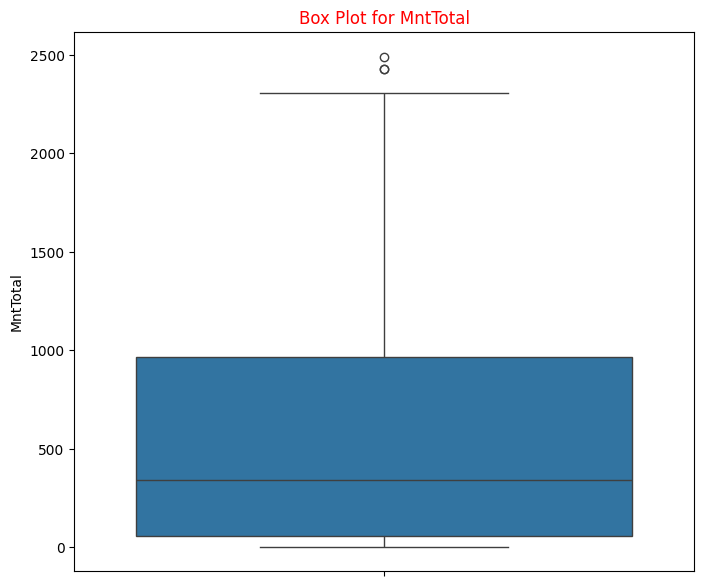

In [ ]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=cs1, y='MntTotal')
plt.title('Box Plot for MntTotal',color='red')
plt.ylabel('MntTotal')
plt.show()

##### 1. Why did you pick the specific chart?

Our analysis will be focused on total amount spent on all products (MntTotal). Boxplot is good to find outliers .

We have found some outliers in mnt total,so we have to remove these outliers.

## Outliers

In [ ]:
Q1 = cs1['MntTotal'].quantile(0.25)
Q3 = cs1['MntTotal'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = cs1[(cs1['MntTotal'] < lower_bound) | (cs1['MntTotal'] > upper_bound)]
outliers.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
1159,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,0,29,2295,0,0,1,0,0,0,0,0,1,0,2429,2333,1
1467,87679.0,0,0,62,1259,172,815,97,148,33,1,7,11,10,4,1,0,1,1,0,0,1,32,2496,0,0,0,1,0,0,0,1,0,0,2491,2458,3
1547,90638.0,0,0,29,1156,120,915,94,144,96,1,3,4,10,1,0,0,1,0,0,0,1,29,2295,0,0,1,0,0,0,0,0,1,0,2429,2333,1


## Remove Outliers

In [ ]:
data = cs1[(cs1['MntTotal'] > lower_bound) & (cs1['MntTotal'] < upper_bound)]
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000,2202.000000
mean,51570.283379,0.442779,0.507266,49.021344,304.960036,26.252044,164.336058,37.678474,26.967302,44.014986,2.320163,4.100363,2.640327,5.817893,5.341508,0.073569,0.074478,0.071753,0.064033,0.013624,0.009083,0.150318,51.124432,2512.923706,0.104450,0.387829,0.215713,0.257493,0.034514,0.089918,0.024523,0.504995,0.164396,0.216167,560.193915,516.178928,0.297457
std,20679.438848,0.537250,0.544429,28.944211,336.135586,39.589747,216.312982,54.821185,40.926101,51.747221,1.886763,2.738390,2.794583,3.240334,2.411466,0.261128,0.262606,0.258137,0.244867,0.115950,0.094891,0.357464,11.687703,202.594957,0.305914,0.487366,0.411409,0.437353,0.182587,0.286130,0.154702,0.500089,0.370719,0.411723,572.096830,549.962471,0.678134
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35182.500000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,2339.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.000000
50%,51258.500000,0.000000,0.000000,49.000000,176.500000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,342.500000,288.000000,0.000000
75%,68146.500000,1.000000,1.000000,74.000000,505.000000,33.000000,230.750000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,962.000000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2304.000000,2259.000000,4.000000


#### Chart - 2
## Box Plot for income analysis

<ipython-input-19-7f1ac619f1f7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cs1, y='Income', palette='viridis')


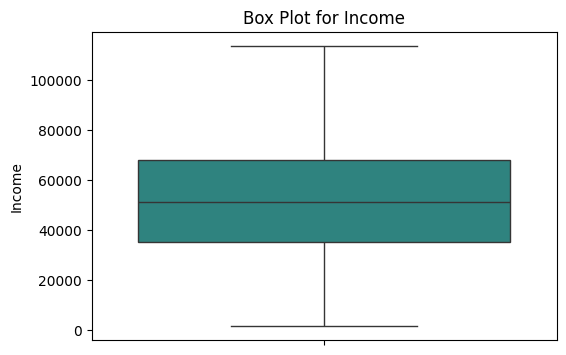

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=cs1, y='Income', palette='viridis')
plt.title('Box Plot for Income')
plt.ylabel('Income')
plt.show()

##### 1. Why did you pick the specific chart?

Boxplot will help us to find outliers if any.

##### 2. What is/are the insight(s) found from the chart?

Income distribution is close to normal distribution with no outliers.

#### Chart - 3
## Histogram for age analysis

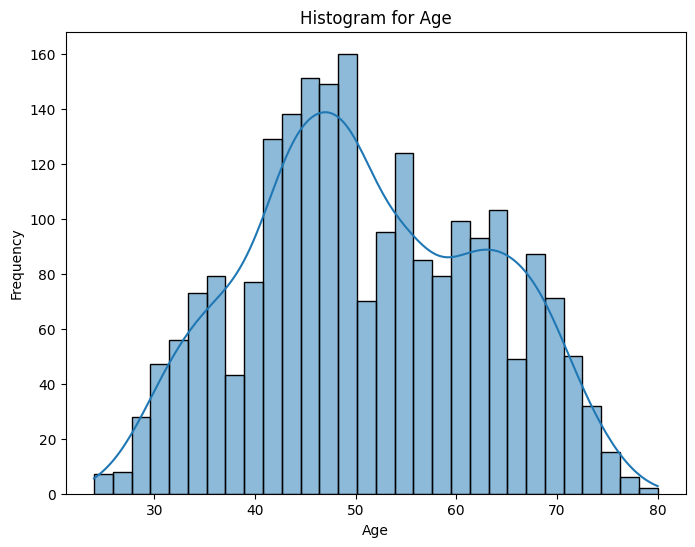

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(8, 6))
sns.histplot(data=cs1, x='Age', bins=30,kde=True)
plt.title('Histogram for Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

##### 1. Why did you pick the specific chart?

It gives us continuous distributions.

##### 2. What is/are the insight(s) found from the chart?

The age distribution looks approximately symmetrical and the left and right sides of distribution are roughly equal. Skewness of 0.09 (close to zero) supports the visual observation of the distribution. Kurtosis of -0.8 suggests that the distribution is close to normal with lighter tails and less peaked than a normal distribution.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
def get_marital_status(row):
    if row['marital_Divorced'] == 1:
        return 'Divorced'
    elif row['marital_Married'] == 1:
        return 'Married'
    elif row['marital_Single'] == 1:
        return 'Single'
    elif row['marital_Together'] == 1:
        return 'Together'
    elif row['marital_Widow'] == 1:
        return 'Widow'
    else:
        return 'Unknown'
cs1['Marital'] = cs1.apply(get_marital_status, axis=1)

<ipython-input-22-ef5a8776a989>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Marital', y='MntTotal', hue='Marital', data=cs1, palette='bright', edgecolor='none',ci=None)


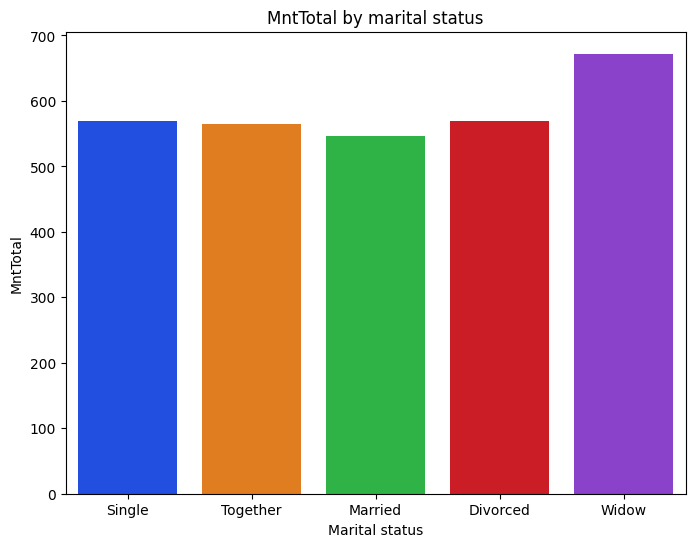

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Marital', y='MntTotal', hue='Marital', data=cs1, palette='bright', edgecolor='none',ci=None)
plt.title('MntTotal by marital status')
plt.xlabel('Marital status')
plt.ylabel('MntTotal')
plt.show()


##### 1. Why did you pick the specific chart?

It is good for categorical analysis.

##### 2. What is/are the insight(s) found from the chart?

Widow has highest total.

#### Chart - 5
Mean consumption of different product types by cluster

In [ ]:
# Chart - 5 visualization code
# Sample dataset (replace with actual data)
selected_features = cs1[['Income', 'MntWines', 'MntMeatProducts', 'MntTotal', 'NumWebPurchases', 'NumStorePurchases']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(selected_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
cs1['Cluster'] = kmeans.fit_predict(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


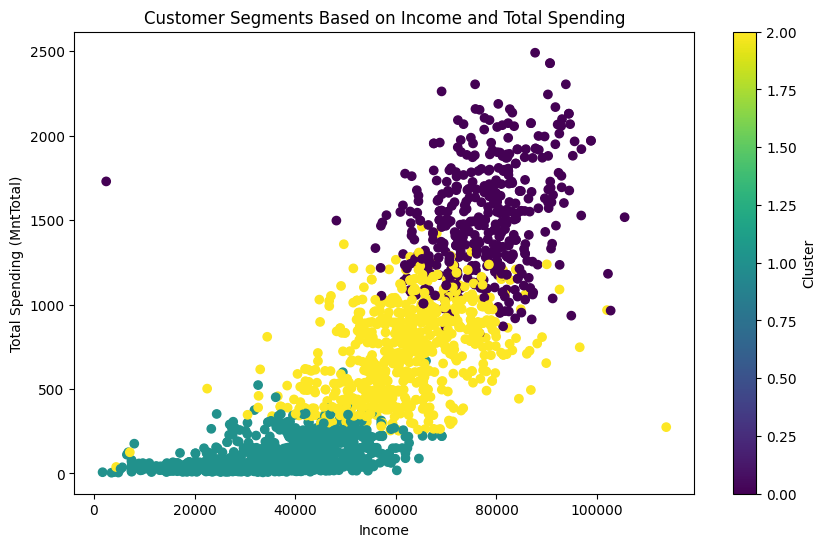

In [ ]:
# Plotting the segments based on Income and Total Spending (MntTotal)
plt.figure(figsize=(10, 6))

# Scatter plot to visualize clusters
plt.scatter(cs1['Income'], cs1['MntTotal'], c=cs1['Cluster'], cmap='viridis')

# Add labels and title
plt.xlabel('Income')
plt.ylabel('Total Spending (MntTotal)')
plt.title('Customer Segments Based on Income and Total Spending')

# Show the plot
plt.colorbar(label='Cluster')
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plot gives the clear analysis between numerical values.

##### 2. What is/are the insight(s) found from the chart?

it is clearly showing that income is increasing with increase spending for clusters.

#### Chart - 6

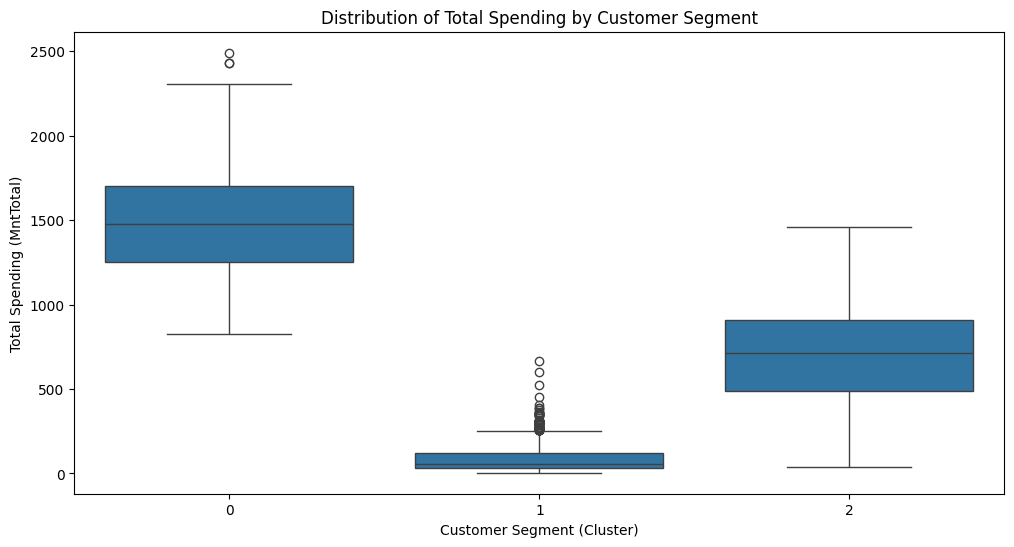

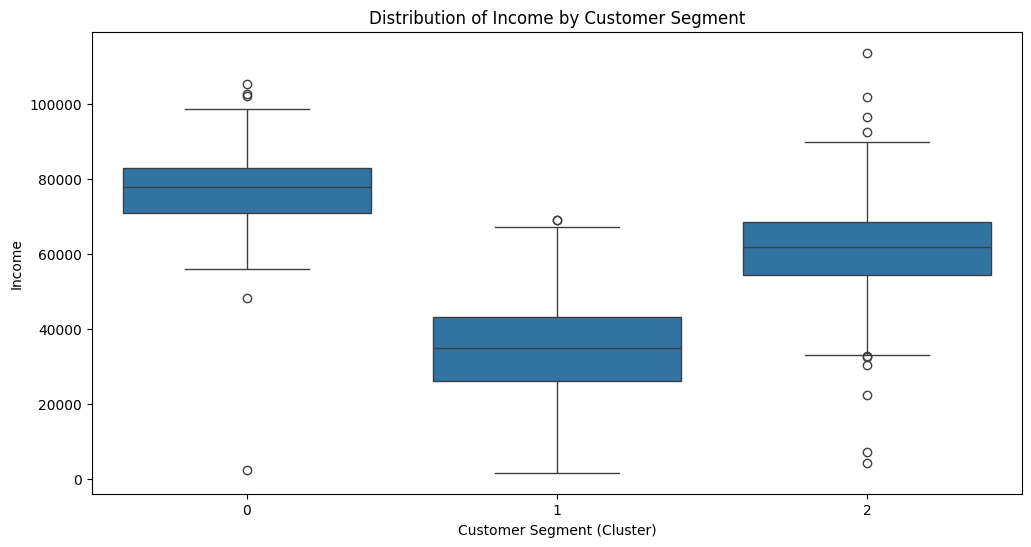

In [ ]:
# Chart - 6 visualization code
# Box plot for Total Spending (MntTotal) by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='MntTotal', data=cs1)
plt.title('Distribution of Total Spending by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Total Spending (MntTotal)')
plt.show()

# Box plot for Income by Segment
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Income', data=cs1)
plt.title('Distribution of Income by Customer Segment')
plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Income')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Customer segment showing large amount of outliers between both income and mnt total(total spending).

#### Chart - 7

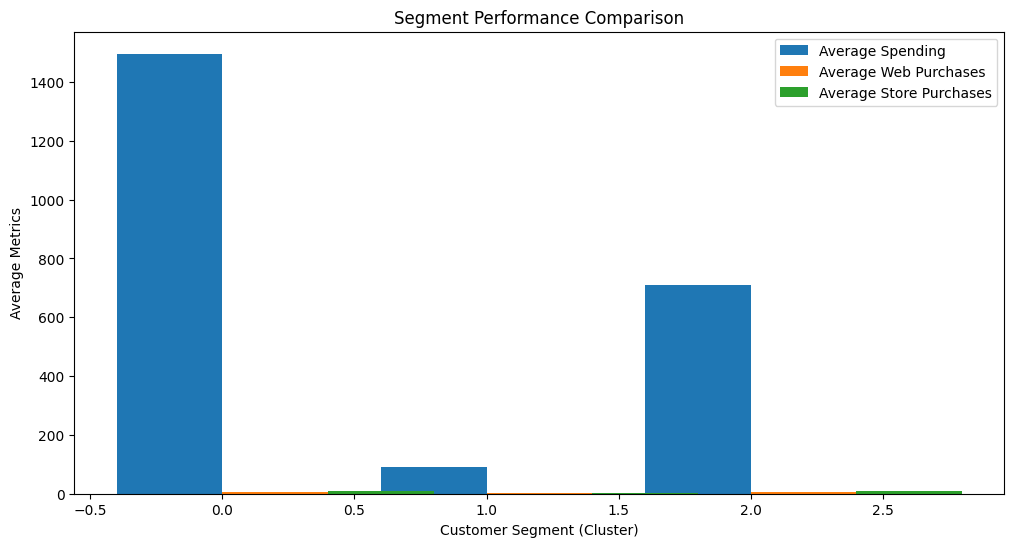

In [ ]:
# Chart - 7 visualization code
# Calculate average spending and purchase frequency by segment
segment_performance = cs1.groupby('Cluster').agg({
    'MntTotal': 'mean',
    'NumWebPurchases': 'mean',
    'NumStorePurchases': 'mean'
}).reset_index()

# Plot average spending
plt.figure(figsize=(12, 6))
plt.bar(segment_performance['Cluster'] - 0.2, segment_performance['MntTotal'], width=0.4, label='Average Spending')
plt.bar(segment_performance['Cluster'] + 0.2, segment_performance['NumWebPurchases'], width=0.4, label='Average Web Purchases')
plt.bar(segment_performance['Cluster'] + 0.6, segment_performance['NumStorePurchases'], width=0.4, label='Average Store Purchases')

plt.xlabel('Customer Segment (Cluster)')
plt.ylabel('Average Metrics')
plt.title('Segment Performance Comparison')
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

Bar chart shows the better visualisation for categorical data.

##### 2. What is/are the insight(s) found from the chart?

It shows the average spending is higher for customer segments comaprison to others.

#### Chart - 8

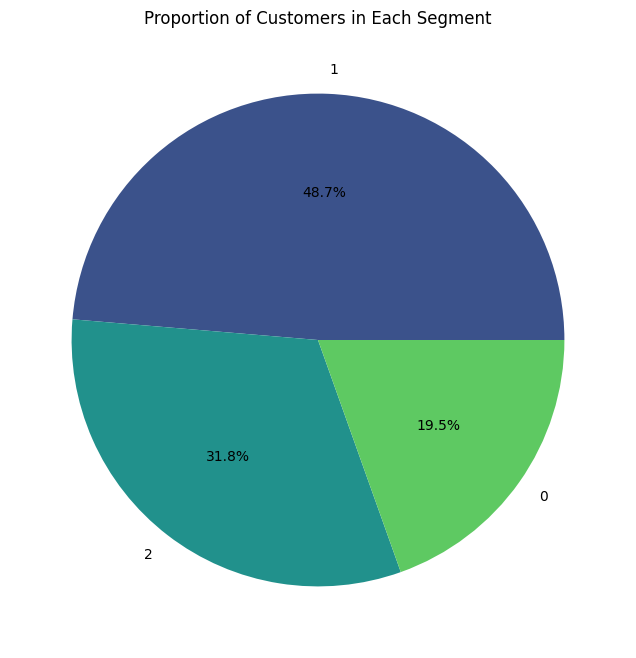

In [ ]:
# Chart - 8 visualization code
# Count number of customers in each segment
segment_size = cs1['Cluster'].value_counts()

# Pie chart for segment size
plt.figure(figsize=(8, 8))
plt.pie(segment_size, labels=segment_size.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(segment_size)))
plt.title('Proportion of Customers in Each Segment')
plt.show()


##### 1. Why did you pick the specific chart?

Pie chart shows the better visualisation between proportions.

##### 2. What is/are the insight(s) found from the chart?

It shows that for segment 1 max people quantity and segment 0 has minimum proportion.

#### Chart - 9 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
cols_demographics = ['Income','Age']
cols_children = ['Kidhome', 'Teenhome']
cols_marital = ['marital_Divorced', 'marital_Married','marital_Single', 'marital_Together', 'marital_Widow']
cols_mnt = ['MntTotal', 'MntRegularProds','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
cols_communication = ['Complain', 'Response', 'Customer_Days']
cols_campaigns = ['AcceptedCmpOverall', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
cols_source_of_purchase = ['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
cols_education = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

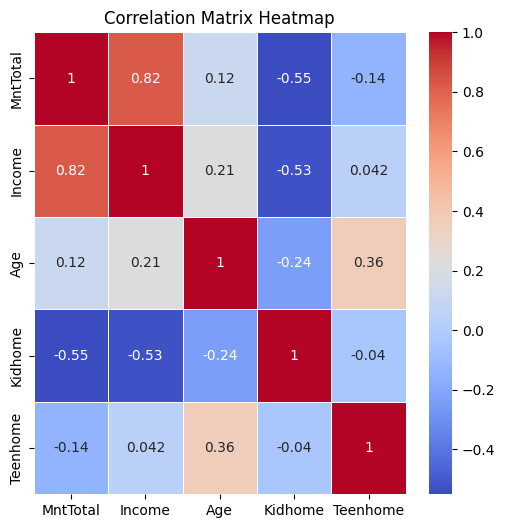

In [ ]:
corr_matrix = cs1[['MntTotal']+cols_demographics+cols_children].corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A correlation heatmap is a powerful tool used in data analysis to visualize the relationships between multiple variables in a dataset.

##### 2. What is/are the insight(s) found from the chart?

MntTotal has strong positive correlation with income and intermediate negative correlation with Kidhome. Income feature has nearly the same negative correlation with Kidhome and MntTotal.

#### Chart - 10 - Pair Plot

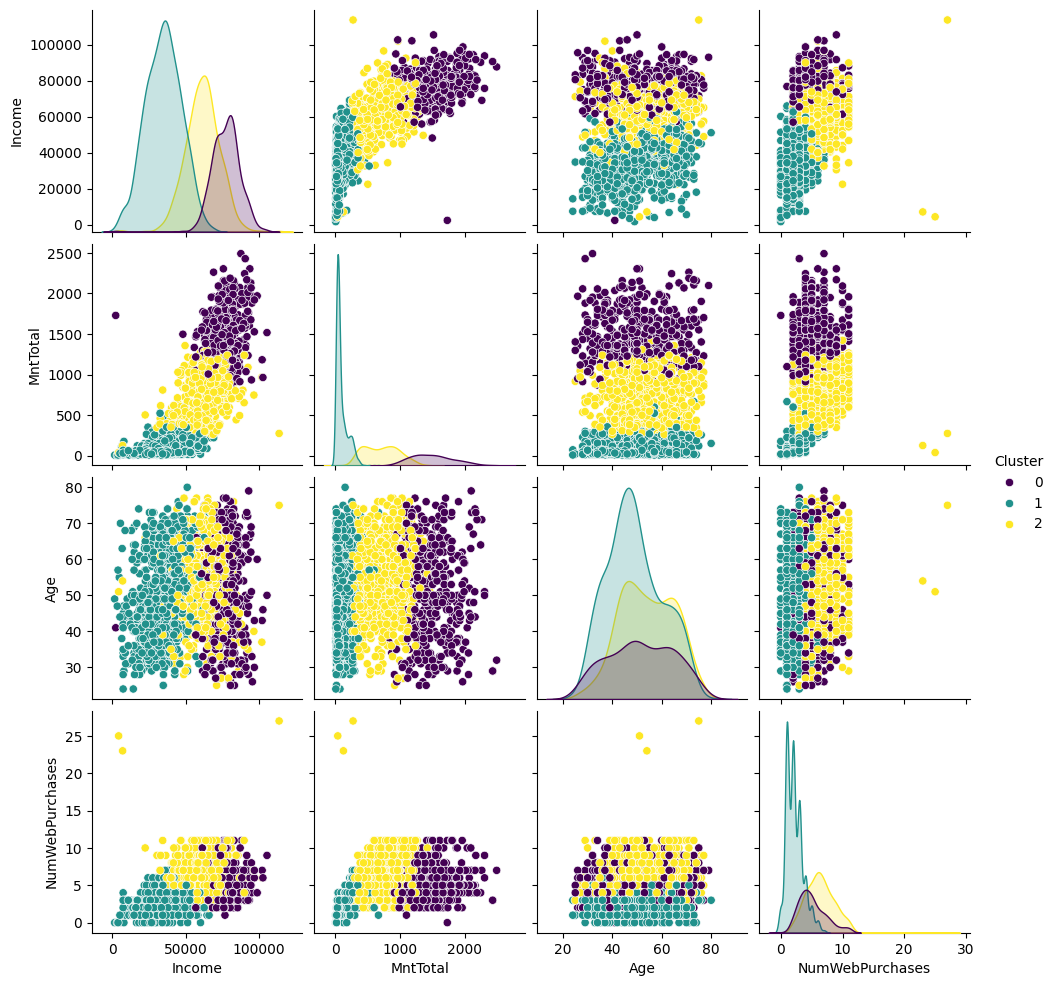

In [ ]:
# Pair Plot visualization code
features_for_pairplot = cs1[['Income', 'MntTotal', 'Age', 'NumWebPurchases', 'Cluster']]

# Create a pair plot
# The 'hue' parameter colors the points based on the 'Cluster' column
sns.pairplot(features_for_pairplot, hue='Cluster', palette='viridis')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

pair plots offer a detailed and visual summary of the relationships between multiple variables in a dataset

##### 2. What is/are the insight(s) found from the chart?

It shows that the income,age,purchases and mnt total is maximum in cluster 1 and minimum for cluster 0.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Understand Customer Behavior:**

Identify distinct customer segments based on their purchasing behavior, demographics, and engagement with marketing campaigns. This will help in understanding the diverse needs and preferences of the customer base.

**Enhance Marketing Strategies:**

Develop targeted marketing strategies tailored to each customer segment. By recognizing different customer profiles, marketing efforts can be more effectively directed to improve engagement, conversion rates, and overall campaign success.

**Improve Customer Engagement and Retention:**

Increase customer satisfaction and loyalty by offering personalized experiences and products that resonate with each segment's specific needs and preferences.

**Optimize Resource Allocation:**

Allocate marketing resources more efficiently by focusing on the most valuable customer segments and refining the approach for less responsive ones.

# **Conclusion**

**Customer Segmentation Insights:**

**Income:**

Customers have a wide range of incomes, suggesting the need for different product offerings and pricing strategies. Higher-income segments might be targeted with premium products or services.

**Family Structure:**

The data shows variability in household composition (e.g., presence of kids or teens). Segmentation can be based on family status to tailor offers and communications.

**Purchasing Behavior:**

 The significant variance in expenditure on different product categories (e.g., wines, fruits, meat) indicates the presence of diverse customer preferences. This diversity should be leveraged to create specific marketing messages and promotions.

**Marketing Campaign Response:**

Accepted Campaigns: The data on campaign acceptance (e.g., AcceptedCmp1, AcceptedCmp2) shows varying levels of response. Analyzing which segments are more responsive can help in refining future campaign strategies and targeting efforts.

**Customer Engagement:**

**Recency and Frequency:**

Recency of last purchase and the frequency of interactions (e.g., NumWebVisitsMonth, NumStorePurchases) provide insights into customer engagement levels. Segments with higher engagement can be targeted with loyalty programs or exclusive offers.

**Demographic Characteristics:**

Age and Marital Status: Age and marital status are important demographic factors that can influence purchasing behavior. Segmentation based on these characteristics can help in crafting personalized marketing messages and product recommendations.

**Revenue and Cost Analysis:**

**Revenue and Cost:**

Variables like Z_Revenue and Z_CostContact can help assess the profitability of different segments. Identifying segments that yield high revenue relative to marketing costs can inform decisions on where to invest more resources.

**Recommendations:**

**Segment Profiles:**

Create detailed profiles for each customer segment based on income, family structure, purchasing behavior, and engagement metrics. Use these profiles to develop targeted marketing strategies.

**Personalized Marketing:**

 Implement personalized marketing approaches for each segment, including customized promotions, content, and product recommendations.

**Campaign Optimization:**

 Analyze the effectiveness of past campaigns for different segments and adjust strategies accordingly to enhance engagement and conversion rates.

By leveraging these insights, the business can improve its marketing efficiency, better meet customer needs, and ultimately drive higher customer satisfaction and loyalty.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***